# DATA EXPLORATION

In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install --upgrade numpy

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [7]:
pip install numpy==1.26.4  pyyaml

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import pandas as pd


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import OneHotEncoder
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
#load the data set
dfTitaTrain = pd.read_csv("Titanic_train.csv")
dfTitaTest = pd.read_csv("Titanic_test.csv")
combine = [dfTitaTrain,dfTitaTest]
combine

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [5]:
#Analyze the cols of the datasets
print (dfTitaTest.columns.values)
print (dfTitaTrain.columns.values)

['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [6]:
dfTitaTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
dfTitaTrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Analyzing w.r.t pivoting features
grouping and sorting the Pclass based on survival rate

In [8]:
dfTitaTrain[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
dfTitaTrain[["Sex","Survived"]].groupby(['Sex'], as_index = False).mean().sort_values(by='Survived',ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
dfTitaTrain[["SibSp","Survived"]].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived',ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
dfTitaTrain[["Parch","Survived"]].groupby(['Parch'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


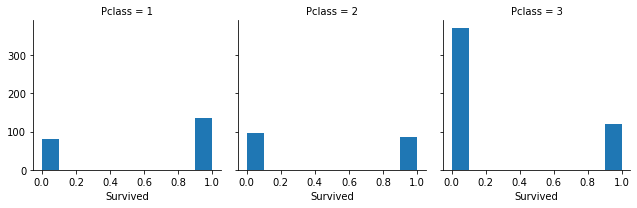

In [12]:
#Visualizing the data
h = sns.FacetGrid(dfTitaTrain, col = 'Pclass')
h.map(plt.hist,'Survived', bins = 10)

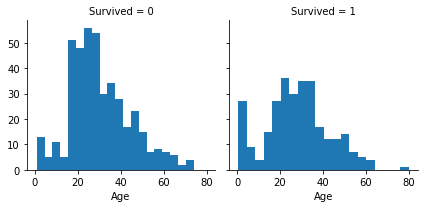

In [13]:

#Visualizing the data
h = sns.FacetGrid(dfTitaTrain, col = 'Survived')
h.map(plt.hist,'Age', bins = 20)

OBSERVATIONS:
1. Pclass = 3 had most passengers, however most did not survive. 
2. Infant passengers survived mostly
3. Most of the passengers in Pclass 1 and 2 survived

Pclass shall be considered for training the model

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


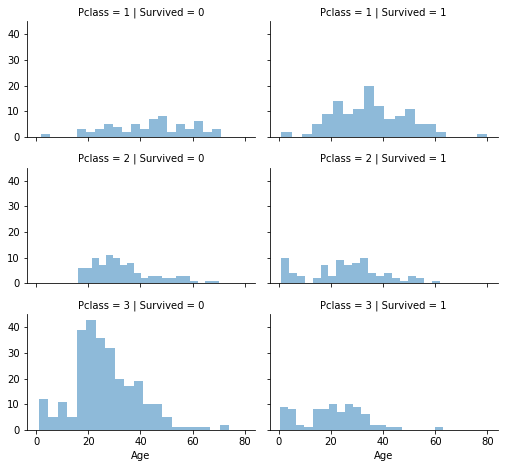

In [14]:
grid = sns.FacetGrid(dfTitaTrain, col = 'Survived', row = 'Pclass', size = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', alpha = 0.5, bins = 20)
grid.add_legend();

Considering features like Sex and Embarked to Model training
Correlating categorical data


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


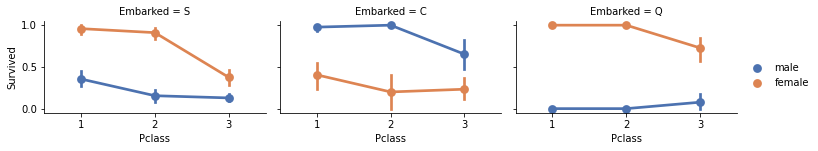

In [15]:
grid = sns.FacetGrid(dfTitaTrain, col = 'Embarked', size = 2.2, aspect =1.6)
grid.map(sns.pointplot,'Pclass','Survived','Sex', palette = 'deep')
grid.add_legend()


Observations:
1. Higher fare paying passengers had much better chances of survival

Conclusion:
1. Consider fare feature in model training



Relation between Sex, Age and Survival Rate

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


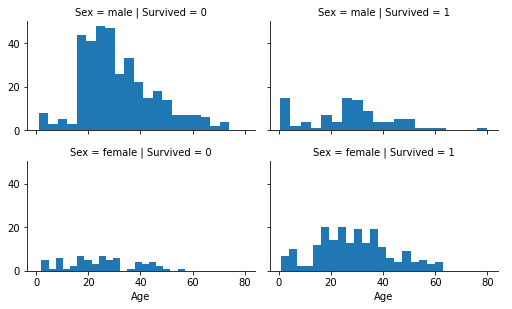

In [16]:
grid = sns.FacetGrid(dfTitaTrain, row = 'Sex', col = 'Survived', size = 2.2, aspect = 1.6)
grid.map(plt.hist,'Age', bins = 20)
grid.add_legend()

Observations:
1. Male Survival rate is less as compared to Females

Checking the relationship between Sex, Embarked, Fare and Survival rate

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


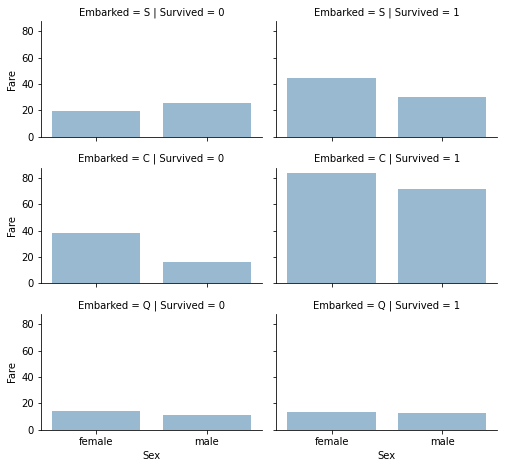

In [17]:
grid = sns.FacetGrid (dfTitaTrain, row = 'Embarked', col = 'Survived', size = 2.2, aspect =1.6)
grid.map(sns.barplot,'Sex','Fare', alpha = 0.5, ci= None)
grid.add_legend()

Based on the above analysis we can take certain decisions:
    1. Dropping the features whose presence does not depend on the target, e.g. ticket, Cabin

In [18]:
dfTitaTrain = dfTitaTrain.drop(['Ticket','Cabin'], axis = 1)
dfTitaTest = dfTitaTest.drop(['Ticket','Cabin'], axis = 1)
combine = [dfTitaTest, dfTitaTrain]

Name and Passenger Id features can be dropped, but we will have to ensure these features have no impact on the survival rate, in order to do so, we can try to find if there is relationship between Name and survival rate. there are titles present in the names, we could extract the titles and check the results

In [19]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand = False)
pd.crosstab(dfTitaTrain['Title'], dfTitaTrain['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [20]:
#Replace title with more common names or classify them as NewT
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'NewT')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')

dfTitaTrain[['Title','Survived']].groupby(['Title'], as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,NewT,0.347826


In [21]:
#Now convert the categorical data to ordinal data
title_mapping = {"Mr": 1, "Miss": 2, "Mrs":3, "Master":4,"NewT":5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
dfTitaTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [22]:
dfTitaTrain['Title'].value_counts()
#dfTitaTrain['Survived'].value_counts()
#dfTitaTrain['Sex'].value_counts()


1    517
2    185
3    126
4     40
5     23
Name: Title, dtype: int64

In [23]:
#Now drop the name & PassengerID feature from dataset
dfTitaTrain = dfTitaTrain.drop(['Name','PassengerId'], axis = 1)
dfTitaTest = dfTitaTest.drop(['Name'],axis = 1)
combine = [dfTitaTrain,dfTitaTest]
dfTitaTrain.shape, dfTitaTest.shape


((891, 9), (418, 9))

In [24]:
#Converting categorical data of feature sex to numerical value
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)
print(dfTitaTrain.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  Title
0         0       3    0  22.0      1      0   7.2500        S      1
1         1       1    1  38.0      1      0  71.2833        C      3
2         1       3    1  26.0      0      0   7.9250        S      2
3         1       1    1  35.0      1      0  53.1000        S      3
4         0       3    0  35.0      0      0   8.0500        S      1


In [26]:
#check for duplicate values
dfTitaTrain[dfTitaTrain.duplicated(keep = False)] # no duplicated data present

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
4,0,3,0,35.0,0,0,8.0500,S,1
26,0,3,0,NaN,0,0,7.2250,C,1
28,1,3,1,NaN,0,0,7.8792,Q,2
29,0,3,0,NaN,0,0,7.8958,S,1
32,1,3,1,NaN,0,0,7.7500,Q,2
...,...,...,...,...,...,...,...,...,...
863,0,3,1,NaN,8,2,69.5500,S,2
870,0,3,0,26.0,0,0,7.8958,S,1
877,0,3,0,19.0,0,0,7.8958,S,1
878,0,3,0,NaN,0,0,7.8958,S,1


It is essential to find the missing /null values. (Completing a numerical continuous feature)
There are 3 methods to this:
1. Generate the random numbers between mean and standard deviation (simple way)
2. More accurate way of guessing missing values is to use other correlated features. In our case there is a relation among Age, Gender and Pclass. Guess Age value using median across sets of Pclass and gender feature combination
3. combibe Method 1 and 2 so instead of guessing age values based on median use random numbers between mean and standard deviation based on the sets of Pclass and Gender combinations

Method 1 & 3 will introduce random noise in our models. The results might vary. hence Method 2 preferred


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


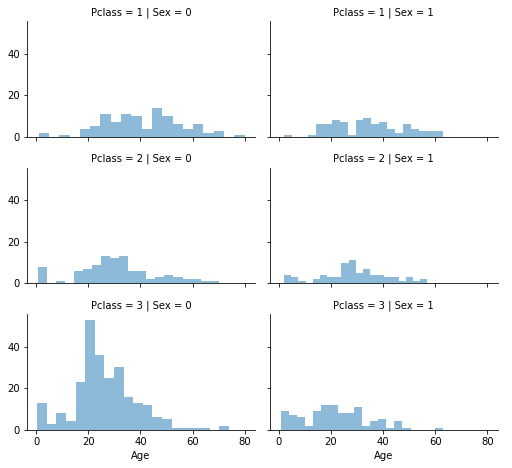

In [27]:
grid = sns.FacetGrid (dfTitaTrain, col = 'Sex', row = 'Pclass', size = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', alpha = 0.5, bins = 20)
grid.add_legend()

In [28]:
#Rounding off hte Age values
#
dfTitaTrain['Age'] = dfTitaTrain['Age'].fillna(dfTitaTrain['Age'].mean())
dfTitaTrain['Age'] = dfTitaTrain['Age'].round().astype('int')
#dfTitaTrain['Age'] = dfTitaTrain['Age'].fillnull(dfTitaTrain['Age'].median())
dfTitaTrain['Age']


0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    30
889    26
890    32
Name: Age, Length: 891, dtype: int32

In [29]:
dfTitaTrain['AgeBand'] = pd.cut(dfTitaTrain['Age'], 5)
dfTitaTrain[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.344762
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [30]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
dfTitaTrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [31]:
dfTitaTrain = dfTitaTrain.drop(['AgeBand'], axis=1)
#dfTitaTrain['Age'] = dfTitaTrain['Age'].round().astype('int')

combine = [dfTitaTrain, dfTitaTest]
dfTitaTrain.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [32]:
dfTitaTrain['Fare'] = dfTitaTrain['Fare'].round().astype('int')
combine = [dfTitaTrain, dfTitaTest]

In [33]:
dfTitaTrain['Fare'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Fare
Non-Null Count  Dtype
--------------  -----
891 non-null    int32
dtypes: int32(1)
memory usage: 3.6 KB


In [34]:
dfTitaTrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7,S,1
1,1,1,1,2,1,0,71,C,3
2,1,3,1,1,0,0,8,S,2
3,1,1,1,2,1,0,53,S,3
4,0,3,0,2,0,0,8,S,1


In [35]:
#Creating a new feature Family Size
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [36]:
dfTitaTrain.head()
dfTitaTrain[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [37]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
dfTitaTrain.head()
dfTitaTrain[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [38]:
dropped_one = dfTitaTrain['Parch']
dropped_two = dfTitaTrain['SibSp']
dropped_three = dfTitaTrain['FamilySize']
dropped_one

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64

In [39]:
dfTitaTrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,1,0,7,S,1,2,0
1,1,1,1,2,1,0,71,C,3,2,0
2,1,3,1,1,0,0,8,S,2,1,1
3,1,1,1,2,1,0,53,S,3,2,0
4,0,3,0,2,0,0,8,S,1,1,1


In [40]:
#dropping the cols SibSO and Parch Family size in favour of isAlone
dfTitaTrain = dfTitaTrain.drop(['Parch','SibSp','FamilySize'],axis = 1)
dfTitaTest = dfTitaTest.drop(['Parch','SibSp','FamilySize'],axis = 1)
combine= [dfTitaTrain, dfTitaTest]
dfTitaTrain.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7,S,1,0
1,1,1,1,2,71,C,3,0
2,1,3,1,1,8,S,2,1
3,1,1,1,2,53,S,3,0
4,0,3,0,2,8,S,1,1


In [41]:
#Creating an Artifical col feature combining Pclass adn Age 
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

dfTitaTrain.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [42]:
dfTitaTrain['Age*Class'].value_counts()

3      382
2      166
0      100
1       89
6       87
4       47
9        9
65       2
71       2
132      1
210      1
195      1
80       1
140      1
70       1
222      1
Name: Age*Class, dtype: int64

In [43]:
freq_port = dfTitaTrain['Embarked'].dropna().mode()[0]
freq_port

'S'

In [44]:
#Fill the na/null values 

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)


#Converting Embarked col category to numerical
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

dfTitaTrain.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7,0,1,0,3
1,1,1,1,2,71,1,3,0,2
2,1,3,1,1,8,0,2,1,3
3,1,1,1,2,53,0,3,0,2
4,0,3,0,2,8,0,1,1,6


In [45]:
#rounding the fare

#dfTitaTrain['Fare'] = dfTitaTrain['Fare'].round().astype('int')
dfTitaTrain['Fare'].fillna(dfTitaTrain['Fare'].dropna().median(),inplace =True)
#dfTitaTrain['Age'] = dfTitaTrain['Age'].fillnull(dfTitaTrain['Age'].median())
dfTitaTrain.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7,0,1,0,3
1,1,1,1,2,71,1,3,0,2
2,1,3,1,1,8,0,2,1,3
3,1,1,1,2,53,0,3,0,2
4,0,3,0,2,8,0,1,1,6


In [46]:

#dfTitaTrain['FareBand'] = pd.qcut(dfTitaTrain['Fare'], 4)
#dfTitaTrain[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


In [47]:
#Creating Fare bands
for dataset in combine:
    dataset.loc[dataset['Fare']<=7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare']<=14.454),'Fare'] = 1
    dataset.loc[(dataset['Fare']>14.454)&(dataset['Fare']<=31),'Fare'] = 2
    dataset.loc[(dataset['Fare']>31, 'Fare')] = 3
    dfTitaTrain['Fare'] = dfTitaTrain['Fare'].round().astype('int')
  #  dataset['Fare'] = dataset['Fare'].astype(int)
#dfTitaTrain['Fare'] = dfTitaTrain['Fare'].round().astype('int')    
#dfTitaTrain = dfTitaTrain.drop[('FareBand')]
combine = [dfTitaTrain, dfTitaTest]
dfTitaTrain

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,1,0,5,1,2
887,1,1,1,1,2,0,2,1,1
888,0,3,1,1,2,0,2,0,3
889,1,1,0,1,2,1,1,1,1


In [48]:
# #Creating Age band
# for dataset in combine:
#     dataset.loc[dataset['Age']<=16 ,'Age'] = 0
#     dataset.loc[(dataset['Age']>16) & (dataset['Age'] <=32),'Age'] =1
#     dataset.loc[(dataset['Age']>32) & (dataset['Age'] <= 48),'Age'] =2
#     dataset.loc[(dataset['Age']>48) & (dataset['Age'] <= 64),'Age'] =3
#     dataset.loc[dataset['Age']>64, 'Age']

# dfTitaTrain.head()

In [49]:
copy_df=dfTitaTrain.copy()
copyTest_df=dfTitaTest.copy()


In [50]:
copy_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


In [51]:
from sklearn.preprocessing import OneHotEncoder

In [52]:
train_Embarked = copy_df["Embarked"].values.reshape(-1,1)
test_Embarked = copyTest_df["Embarked"].values.reshape(-1,1)

In [53]:
#train_Embarked = copy_df["Embarked"].reshape(-1,1)
#test_Embarked = copyTest_df["Embarked"].reshape(-1,1)

In [54]:
onehot_encoder = OneHotEncoder(sparse=False)
train_OneHotEncoded = onehot_encoder.fit_transform(train_Embarked)
test_OneHotEncoded = onehot_encoder.fit_transform(test_Embarked)

In [55]:
copy_df["EmbarkedS"] = train_OneHotEncoded[:,0]
copy_df["EmbarkedC"] = train_OneHotEncoded[:,1]
copy_df["EmbarkedQ"] = train_OneHotEncoded[:,2]
copyTest_df["EmbarkedS"] = test_OneHotEncoded[:,0]
copyTest_df["EmbarkedC"] = test_OneHotEncoded[:,1]
copyTest_df["EmbarkedQ"] = test_OneHotEncoded[:,2]

In [56]:
copy_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class,EmbarkedS,EmbarkedC,EmbarkedQ
0,0,3,0,1,0,0,1,0,3,1.0,0.0,0.0
1,1,1,1,2,3,1,3,0,2,0.0,1.0,0.0
2,1,3,1,1,1,0,2,1,3,1.0,0.0,0.0
3,1,1,1,2,3,0,3,0,2,1.0,0.0,0.0
4,0,3,0,2,1,0,1,1,6,1.0,0.0,0.0


In [57]:
copyTest_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class,EmbarkedS,EmbarkedC,EmbarkedQ
0,892,3,0,2.0,0.0,2,1,1,6.0,0.0,0.0,1.0
1,893,3,1,2.0,0.0,0,3,0,6.0,1.0,0.0,0.0
2,894,2,0,3.0,1.0,2,1,1,6.0,0.0,0.0,1.0
3,895,3,0,1.0,1.0,0,1,1,3.0,1.0,0.0,0.0
4,896,3,1,1.0,1.0,0,3,0,3.0,1.0,0.0,0.0


In [58]:
X_testTest.head()

NameError: name 'X_testTest' is not defined

Outlier detection and creation of box plots






Survived      0.478523
Pclass       -0.630548
Sex           0.618921
Age           8.771723
Fare          0.122610
Embarked      1.543397
Title         1.377974
IsAlone      -0.420431
Age*Class    11.519392
dtype: float64

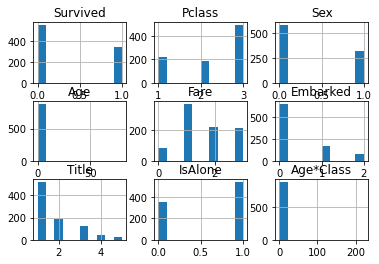

In [59]:
dfTitaTrain.hist()
dfTitaTrain.skew()

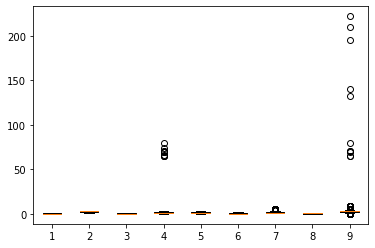

In [60]:
#box = dfTitaTrain[['Pclass','Age','Embarked']].boxplot()
box = plt.boxplot(dfTitaTrain)

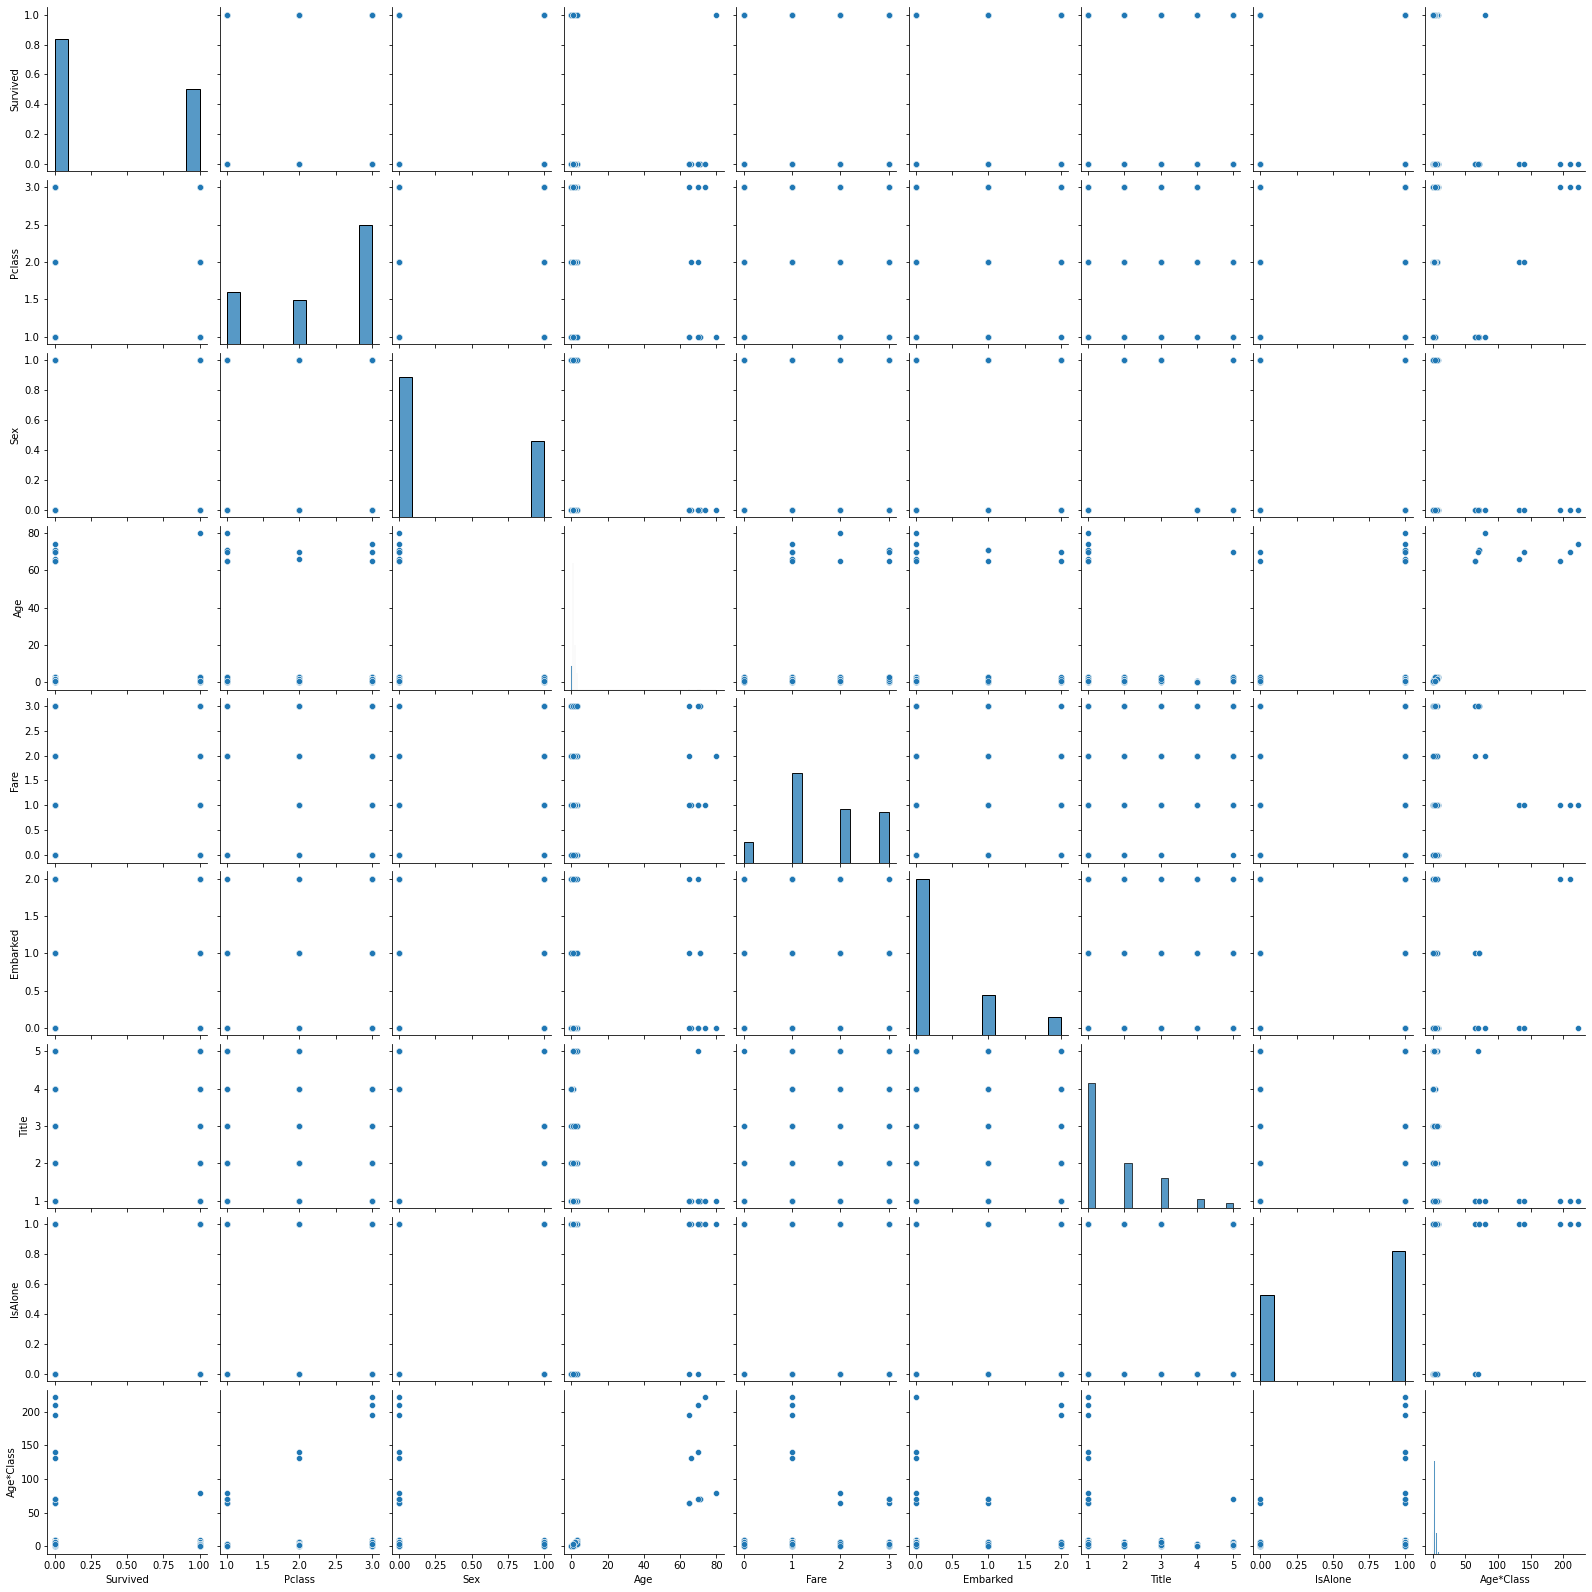

In [61]:
import seaborn as sns
sns.pairplot(dfTitaTrain)
plt.show()

In [62]:
#Calculate the correlation Matrix

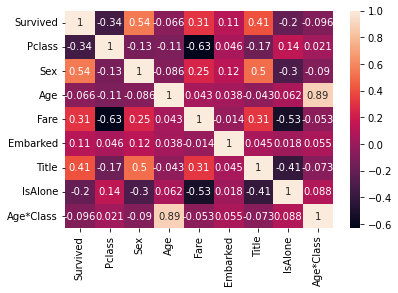

In [64]:
corr = dfTitaTrain.corr()
sns.heatmap(corr, xticklabels = corr.columns, annot = True)
plt.show()

# BUILD LOGICAL REGRESSION MODEL

In [65]:
X_trainTest = copy_df.drop(copy_df.columns[[0,5]],axis =1)
Y_trainTest = copy_df['Survived']
X_testTest = copyTest_df.drop(copyTest_df.columns[[0,5]], axis = 1)
X_trainTest.head()

,Pclass,Sex,Age,Fare,Title,IsAlone,Age*Class,EmbarkedS,EmbarkedC,EmbarkedQ
0,3,0,1,0,1,0,3,1.0,0.0,0.0
1,1,1,2,3,3,0,2,0.0,1.0,0.0
2,3,1,1,1,2,1,3,1.0,0.0,0.0
3,1,1,2,3,3,0,2,1.0,0.0,0.0
4,3,0,2,1,1,1,6,1.0,0.0,0.0


In [66]:

logReg = LogisticRegression()
logReg.fit(X_trainTest,Y_trainTest)
acc =round(logReg.score(X_trainTest,Y_trainTest)*100,2)
acc

79.69

# MODEL EVALUATION -ROC curve

In [67]:
from sklearn.metrics import roc_curve, auc


In [68]:
y_pred_proba = logReg.predict_proba(X_trainTest)[:,1]


Calculate ROC curve
     

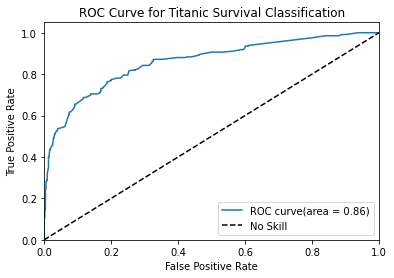

In [69]:
fpr, tpr, thresholds = roc_curve(Y_trainTest, y_pred_proba)
roc_auc = auc(fpr,tpr)
#Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve(area = %0.2f)' %roc_auc) 
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Titanic Survival Classification')
plt.legend()
plt.show()

INTERPRETATION:
The dashed line represents the ROC curve for the classifier. The AUC as 1 signifies perfect classification, meaning the model can distingusih survival rate at any threshold.
The curve here indicates high TPR (correctly identifying the true positive values). The ROC curve for survival rate is not closer to the diagonal baseline, indicating the classifier' performance is not bad.
The ROC curve value is 0.86 indicating it is close to value 1 (1 indicates perfect classification and a value of 0.5 indicates no better than random guessing)


Coefficients of logistic Regression Model

In [70]:
print('intercept',logReg.intercept_[0])
print('classes', logReg.classes_)
pd.DataFrame({'coeff': logReg.coef_[0]}, index=X_trainTest.columns)

intercept -0.26444633807337486
classes [0 1]


,coeff
Pclass,-0.646746
Sex,2.212189
Age,0.269010
Fare,0.030402
Title,0.403926
IsAlone,0.281582
Age*Class,-0.293178
EmbarkedS,-0.283240
EmbarkedC,0.232400
EmbarkedQ,0.052239


SAVE THE MODEL

In [71]:
import joblib
joblib.dump(logReg,"logReg.pkl")

['logReg.pkl']

# DEPLOYMENT using STREAMLIT


In [72]:
pip install streamlit


Defaulting to user installation because normal site-packages is not writeable
  Using cached streamlit-1.41.1-py2.py3-none-any.whl (9.1 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [73]:
import streamlit as st
import pickle

In [75]:
#load trained model
with open ('logReg.pkl','rb') as f:
    model = pickle.load(f)

#Define a function to make predictions
def predict(features):
    prediction = model.predict(features)
    return prediction

#Create the stramlit app
def main():
    st.title("Prediction App")
    
    feature1 = st.number_input("Feature 1")
    feature2 = st.number_input("Feature 2")
    
    if st.button("Predict"):
        features = [[feature1, feature2]]
        prediction = predict(features)
        
        st.write("Prediction:",prediction)